# HW1 - Fundamentals of Artificial Neural Networks

### by Clay Curry

### Part 1 — AN Representation

#### 1. This is represented as
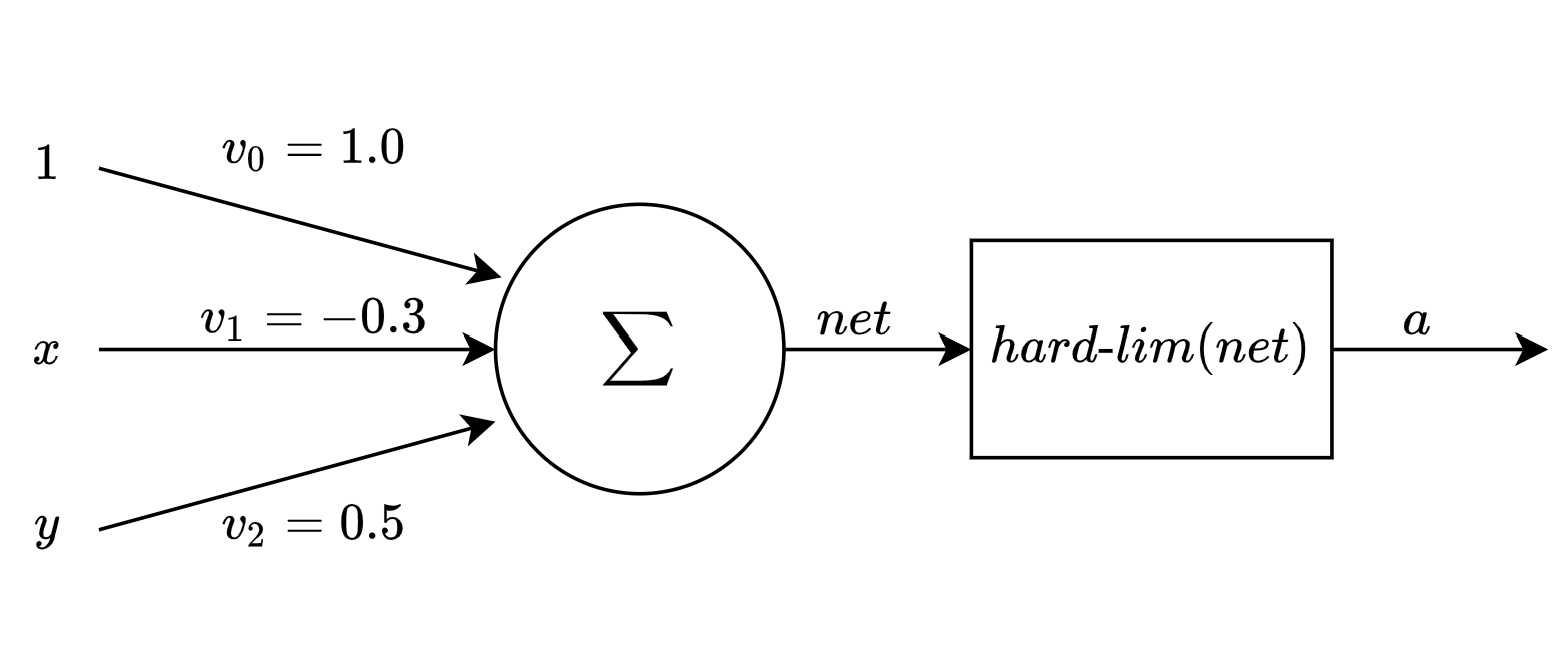

#### where the activation function, $hard\text{-}lim: \mathbb{R} \to [0, 1]$, is defined by,

$$
hard\text{-}lim(net) = \begin{cases} 
      0 & net< 0 \\
      1 & 0\geq net
   \end{cases}
$$

#### 2. The hard-lim function generates a decision boundary defined by

$$
v_0 + v_1 x + v_2 y = 0
$$

#### which rearranges to

$$
y = -\frac{v_1}{v_2}x - \frac{v_0}{v_2} = 0.6 x - 2
$$

#### with the plot,

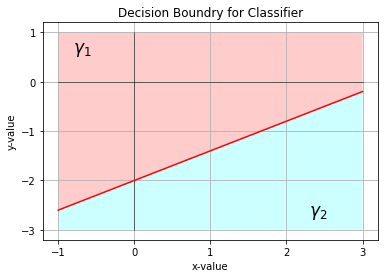

In [87]:
import matplotlib.pyplot as plt
import numpy as np

v0 = 1.0
v1 = -0.3
v2 = 0.5

x = np.linspace(-1, 3, 2)
y = -(v1/v2) * x - (v0/v2)

x_axis = np.linspace(-1, 3, 2)
y_axis = np.linspace(-3, 1, 2)
fig, (ax) = plt.subplots()
ax.fill_between(x, 1, y, facecolor=(1,.8,.8))
ax.fill_between(x, -3, y, facecolor=(.8, 1, 1))
p = plt.xticks([-1, 0, 1, 2, 3])
p = plt.yticks([-3, -2, -1, 0, 1])
plt.annotate("$\gamma_1$", (-.8, .6), fontsize=17)
plt.annotate("$\gamma_2$", (2.3, -2.7), fontsize=17)
plt.xlabel('x-value') 
plt.ylabel('y-value')
plt.title('Decision Boundry for Classifier')
ax.grid(True)
p = plt.plot(x_axis, 0*x_axis, 'k', 0 * y_axis, y_axis, 'k', linewidth=0.5)
p = plt.plot(x, y, 'r-')

#### 3. Adding some points

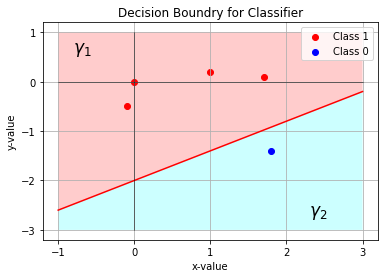

In [88]:
v0 = 1.0
v1 = -0.3
v2 = 0.5

x = np.linspace(-1, 3, 2)
y = -(v1/v2) * x - (v0/v2)


x_p = (1.0, 0, -0.1, 1.7, 1.8)
y_p = (0.2, 0, -0.5, 0.1, -1.4)


x_axis = np.linspace(-1, 3, 2)
y_axis = np.linspace(-3, 1, 2)
fig, (ax) = plt.subplots()
ax.fill_between(x, 1, y, facecolor=(1,.8,.8))
ax.fill_between(x, -3, y, facecolor=(.8, 1, 1))
p = plt.xticks([-1, 0, 1, 2, 3])
p = plt.yticks([-3, -2, -1, 0, 1])
plt.annotate("$\gamma_1$", (-.8, .6), fontsize=17)
plt.annotate("$\gamma_2$", (2.3, -2.7), fontsize=17)
plt.xlabel('x-value') 
plt.ylabel('y-value')
plt.title('Decision Boundry for Classifier')
ax.grid(True)

class_1 = [(x,y) for (x,y) in zip(x_p, y_p) if y >= .6* x - 2]
ax.scatter(x=[x[0] for x in class_1],
           y=[y[1] for y in class_1], 
           c='r', label='Class 1')
    
class_0 = [(x,y) for (x,y) in zip(x_p, y_p) if y < .6* x - 2]
ax.scatter(x=[x[0] for x in class_0],
           y=[y[1] for y in class_0], 
           c='b', label='Class 0')
    
ax.legend()
p = plt.plot(x, y, 'r-')
p = plt.plot(x_axis, 0*x_axis, 'k', 0 * y_axis, y_axis, 'k', linewidth=0.5)


#### 4. Adding the point 
$$(2,-2) \in \text{Class 1}$$

#### to $\mathbb{R}^2$ creates a situation where no line $\mathcal l \subset \mathbb{R}^2$ exists that partitions $\mathbb{R}^2$ into disjoint subsets $X_1, X_2$ with all points in $\text{Class 0} \subset X_1$ and all points $\text{Class 1} \subset X_2$. 

#### It can be demonstrated that $(2,-2) \in \text{Class 1}$ creates linearly inseperable classes by showing that $(2,-2)$ is colinear with two other points in $\text{Class 1}$ with point in $\text{Class 0}$ on either side the lines creates by two points. 

#### 5. I do not see a reason this changes the nature of the boundry. It would affect the training.


#### 6. Selecting a sigmoidal activation function might result in a decision boundry with enough flexibility to separate the two classes. 

#### 7. Fully separating the classes may be possible if using a sigmoidal activation function, because the sigmoid function paramaterizes a curve rather than a straight line.



### Part 2 — AN Learning

Consider the learning rule

$$
v_i(t) = v_i(t-1) + (t_p - o_p)z_{i,p}
$$

with

$$
(-0.1, -1.0) \in \text{Class 2}
$$

$$
(0.2, -0.9) \in \text{Class 2}
$$

$$
(0.6, 0.8) \in \text{Class 1}
$$

$$
(0.0, 0.0) \in \text{Class 1}
$$

#### Before applying learning rule



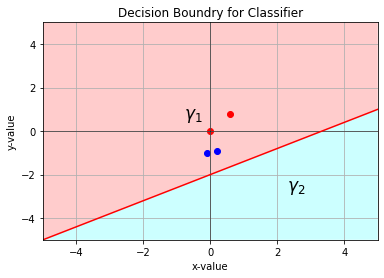

In [89]:
v0 = 1.0
v1 = -0.3
v2 = 0.5

x = np.linspace(-5, 5, 2)
y = -(v1/v2) * x - (v0/v2)

x_axis = np.linspace(-5, 5, 2)
y_axis = np.linspace(-5, 5, 2)
fig, (ax) = plt.subplots()
ax.fill_between(x, 5, y, facecolor=(1,.8,.8))
ax.fill_between(x, -5, y, facecolor=(.8, 1, 1))
plt.annotate("$\gamma_1$", (-.8, .6), fontsize=17)
plt.annotate("$\gamma_2$", (2.3, -2.7), fontsize=17)
plt.xlabel('x-value') 
plt.ylabel('y-value')
plt.title('Decision Boundry for Classifier')
ax.grid(True)
plt.xlim(-5,5)
plt.ylim(-5,5)
p = plt.plot(x_axis, 0*x_axis, 'k', 0 * y_axis, y_axis, 'k', linewidth=0.5)
p = plt.plot(x, y, 'r-')
p = ax.scatter(-0.1, -1.0, c='b')
p = ax.scatter(0.2, -0.9, c='b')
p = ax.scatter(0.6, 0.8, c='r')
p = ax.scatter(0.0, 0.0, c='r')

#### After applying learning rule to $(-0.1, -1.0)$

before: v0 = 1.0
before: v1 = -0.3
before: v2 = 0.5
after: v0 = 2.0
after: v1 = -0.4
after: v2 = -0.5


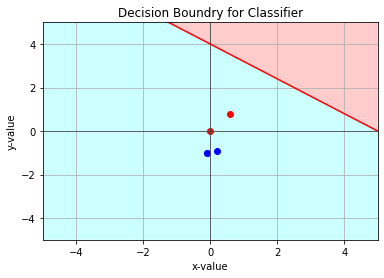

In [90]:
(z1, z2) = (-0.1, -1.0)
print(f"before: v0 = {v0}")
print(f"before: v1 = {v1}")
print(f"before: v2 = {v2}")
v0 = v0 + (1-0) * 1
v1 = v1 + (1-0) * z1
v2 = v2 + (1-0) * z2
print(f"after: v0 = {v0}")
print(f"after: v1 = {v1}")
print(f"after: v2 = {v2}")

x = np.linspace(-5, 5, 2)
y = -(v1/v2) * x - (v0/v2)


x_axis = np.linspace(-5, 5, 2)
y_axis = np.linspace(-5, 5, 2)
fig, (ax) = plt.subplots()
ax.fill_between(x, 5, y, facecolor=(1,.8,.8))
ax.fill_between(x, -5, y, facecolor=(.8, 1, 1))
plt.xlabel('x-value') 
plt.ylabel('y-value')
plt.title('Decision Boundry for Classifier')
ax.grid(True)
p = plt.plot(x_axis, 0*x_axis, 'k', 0 * y_axis, y_axis, 'k', linewidth=0.5)
p = plt.plot(x, y, 'r-')
plt.xlim(-5,5)
plt.ylim(-5,5)
p = ax.scatter(z1,z2)
p = ax.scatter(-0.1, -1.0, c='b')
p = ax.scatter(0.2, -0.9, c='b')
p = ax.scatter(0.6, 0.8, c='r')
p = ax.scatter(0.0, 0.0, c='r')

#### After applying learning rule to $(0.2, -0.9)$

before: v0 = 2.0
before: v1 = -0.4
before: v2 = -0.5
after: v0 = 2.0
after: v1 = -0.4
after: v2 = -0.5


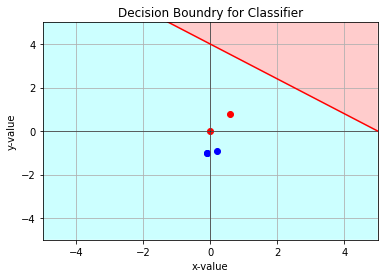

In [91]:
(z1, z2) = (0.2, -0.9)
print(f"before: v0 = {v0}")
print(f"before: v1 = {v1}")
print(f"before: v2 = {v2}")
v0 = v0 + (0-0) * 1
v1 = v1 + (0-0) * z1
v2 = v2 + (0-0) * z2
print(f"after: v0 = {v0}")
print(f"after: v1 = {v1}")
print(f"after: v2 = {v2}")

x = np.linspace(-5, 5, 2)
y = -(v1/v2) * x - (v0/v2)


x_axis = np.linspace(-5, 5, 2)
y_axis = np.linspace(-5, 5, 2)
fig, (ax) = plt.subplots()
ax.fill_between(x, 5, y, facecolor=(1,.8,.8))
ax.fill_between(x, -5, y, facecolor=(.8, 1, 1))
plt.xlabel('x-value') 
plt.ylabel('y-value')
plt.title('Decision Boundry for Classifier')
ax.grid(True)
p = plt.plot(x_axis, 0*x_axis, 'k', 0 * y_axis, y_axis, 'k', linewidth=0.5)
p = plt.plot(x, y, 'r-')
plt.xlim(-5,5)
plt.ylim(-5,5)
ax.scatter(-0.1, -1.0, c='b')
p = ax.scatter(-0.1, -1.0, c='b')
p = ax.scatter(0.2, -0.9, c='b')
p = ax.scatter(0.6, 0.8, c='r')
p = ax.scatter(0.0, 0.0, c='r')

#### After applying learning rule to $(0.6, 0.8)$

before: v0 = 2.0
before: v1 = -0.4
before: v2 = -0.5
after: v0 = 1.0
after: v1 = -1.0
after: v2 = -1.3


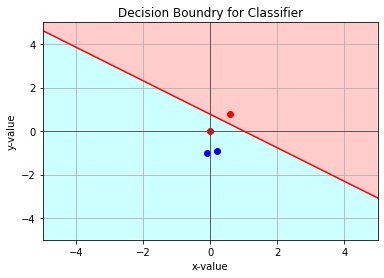

In [92]:
(z1, z2) = (0.6, 0.8)
print(f"before: v0 = {v0}")
print(f"before: v1 = {v1}")
print(f"before: v2 = {v2}")
v0 = v0 + (0-1) * 1
v1 = v1 + (0-1) * z1
v2 = v2 + (0-1) * z2
print(f"after: v0 = {v0}")
print(f"after: v1 = {v1}")
print(f"after: v2 = {v2}")


x = np.linspace(-5, 5, 2)
y = -(v1/v2) * x - (v0/v2)


x_axis = np.linspace(-5, 5, 2)
y_axis = np.linspace(-5, 5, 2)
fig, (ax) = plt.subplots()
ax.fill_between(x, 5, y, facecolor=(1,.8,.8))
ax.fill_between(x, -5, y, facecolor=(.8, 1, 1))
plt.xlabel('x-value') 
plt.ylabel('y-value')
plt.title('Decision Boundry for Classifier')
ax.grid(True)
plt.xlim(-5,5)
plt.ylim(-5,5)
p = plt.plot(x_axis, 0*x_axis, 'k', 0 * y_axis, y_axis, 'k', linewidth=0.5)
p = plt.plot(x, y, 'r-')
p = ax.scatter(-0.1, -1.0, c='b')
p = ax.scatter(0.2, -0.9, c='b')
p = ax.scatter(0.6, 0.8, c='r')
p = ax.scatter(0.0, 0.0, c='r')

#### After applying learning rule to $(0.0, 0.0)$

before: v0 = 1.0
before: v1 = -1.0
before: v2 = -1.3
after: v0 = 0.0
after: v1 = -1.0
after: v2 = -1.3


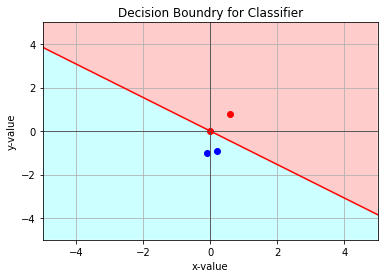

In [93]:
(z1, z2) = (0,0)
print(f"before: v0 = {v0}")
print(f"before: v1 = {v1}")
print(f"before: v2 = {v2}")
v0 = v0 + (0-1) * 1
v1 = v1 + (0-1) * z1
v2 = v2 + (0-1) * z2
print(f"after: v0 = {v0}")
print(f"after: v1 = {v1}")
print(f"after: v2 = {v2}")


x = np.linspace(-5, 5, 2)
y = -(v1/v2) * x - (v0/v2)


x_axis = np.linspace(-5, 5, 2)
y_axis = np.linspace(-5, 5, 2)
fig, (ax) = plt.subplots()
ax.fill_between(x, 5, y, facecolor=(1,.8,.8))
ax.fill_between(x, -5, y, facecolor=(.8, 1, 1))
plt.xlabel('x-value') 
plt.ylabel('y-value')
plt.title('Decision Boundry for Classifier')
ax.grid(True)
plt.xlim(-5,5)
plt.ylim(-5,5)
p = plt.plot(x_axis, 0*x_axis, 'k', 0 * y_axis, y_axis, 'k', linewidth=0.5)
p = plt.plot(x, y, 'r-')
p = ax.scatter(-0.1, -1.0, c='b')
p = ax.scatter(0.2, -0.9, c='b')
p = ax.scatter(0.6, 0.8, c='r')
p = ax.scatter(0.0, 0.0, c='r')

#### 3. Explain which of the points in 2.1 are correctly classified by this AN after all of the weight updates
##### 1. Before the first pass, all points were classified as red
##### 2. After the first pass, all points were classified as blue
##### 3. After the second pass, nothing changed
##### 4. After the third pass, only one red was misclassified
##### 5. All the points were accurely classified after the final pass

#### 4. Explain how many more passes through the data are needed before all of the points from 2.1 are correctly classified by this AN

##### According to my model, all points were accurately classified after the training rule was applied to each point once. Therefore no more passes were necessary.

#### 5. Explain the likely effect of introducing a learning rate parameter (η) into the equation given.

##### Introducing a learning rate parameter $\eta$ would have a varying effect depending on the value of $\eta$. 

##### For example, if $\eta < 1$, then the model might have accurately bisected the points after the first pass. Similarly, if $\eta > 1$, then the model might have overshot the appropriate y-intercept on the final pass. 

##### The exact effect of $\eta$ would need to be determined experimentally.